#### Simple SQL quaries were used in order to extract three tables from the database:

select * from city_list

select * from global_data

select * from city_data

In [1]:
cd C:\Users\JPierson\Desktop\PythonFiles\Project1

C:\Users\JPierson\Desktop\PythonFiles\Project1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
city_data = pd.read_csv("city_data.csv")
global_data = pd.read_csv("global_data.csv")

In [4]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [5]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


#### Considering the large number of cities in city_data and the fact that the names of the countries are not crucial for the purposes of our research it's a good idea to expose the data in city_data in the form of panel data

In [6]:
city_data_exposed = city_data.pivot_table(values='avg_temp',
                                index='year',
                                columns=['city',])

In [7]:
city_data_exposed.Baku.describe()

count    206.000000
mean      11.099806
std        0.923263
min        5.500000
25%       10.580000
50%       11.065000
75%       11.617500
max       14.120000
Name: Baku, dtype: float64

In [8]:
city_data_exposed.head()

city,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Adelaide,Agra,Ahmadabad,Albuquerque,Alexandria,...,Wichita,Windhoek,Wuhan,Wuxi,Xian,Xuzhou,Yamoussoukro,Yerevan,Zagreb,Zapopan
year,,,,,,,,,,,,,,,,,,,,,
1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.49,NaN
1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.06,NaN
1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.30,NaN
1746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
city_data_exposed.insert(loc=0, column= "Year", value=city_data_exposed.index)

In [10]:
city_data_exposed.head()

city,Year,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Adelaide,Agra,Ahmadabad,Albuquerque,...,Wichita,Windhoek,Wuhan,Wuxi,Xian,Xuzhou,Yamoussoukro,Yerevan,Zagreb,Zapopan
year,,,,,,,,,,,,,,,,,,,,,
1743,1743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.49,NaN
1744,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.06,NaN
1745,1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.30,NaN
1746,1746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,1747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
city_data_exposed.to_csv('city_data_exposed.csv', index=False)

#### As one of the goals of our research is to compare average temperatures of the individual cities with the global average temperatures it's useful to combine global data with the city data

In [12]:
city_data_exposed.shape

(271, 330)

In [13]:
global_data.shape

(266, 2)

In [14]:
global_data.rename(columns={'year':'Year'}, inplace=True)

In [15]:
combined_data = pd.merge(city_data_exposed, global_data, on=["Year"])

In [16]:
combined_data.head()

,Year,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Adelaide,Agra,Ahmadabad,Albuquerque,...,Windhoek,Wuhan,Wuxi,Xian,Xuzhou,Yamoussoukro,Yerevan,Zagreb,Zapopan,avg_temp
0,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,NaN,8.72
1,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.53,NaN,7.98
2,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.97,NaN,5.78
3,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.44,NaN,8.39
4,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.24,NaN,8.47


#### Now it's time for some cleaning work. 

In [17]:
# check which columns have missing values with info()

combined_data.isna().sum()

Year                0
Abidjan           113
Abu Dhabi         105
Abuja             116
Accra             113
Adana              41
Adelaide           91
Agra               58
Ahmadabad          58
Albuquerque        70
Alexandria          1
Algiers             3
Allahabad          54
Almaty             80
Amritsar           88
Amsterdam           0
Ankara             18
Anshan             80
Antananarivo      114
Arlington           1
Asmara            124
Astana             62
Athens              3
Atlanta             1
Austin             70
Baghdad            69
Baku               58
Baltimore           1
Bamako            106
Bandung           105
                 ... 
Toronto             0
Tripoli             3
Tucson             85
Tulsa              36
Tunis               1
Ufa                21
Ulaanbaatar        70
Vadodara           53
Valencia            0
Varanasi           54
Victoria           81
Vienna              0
Vientiane          74
Vilnius             0
Virginia B

#### It can be clearly seen that most of the missing data in the columns occur in the earlier periods and that's quite logical taking into account lack of statistics in previous centuries. Therefore we drop all the data (mostly missing) before the year 1808. 

In [18]:
pd.set_option("max_columns", 1000)

In [19]:
combined_data_final = combined_data[combined_data["Year"]>1808]
combined_data_final.head(10)

,Year,Abidjan,Abu Dhabi,Abuja,Accra,Adana,Adelaide,Agra,Ahmadabad,Albuquerque,Alexandria,Algiers,Allahabad,Almaty,Amritsar,Amsterdam,Ankara,Anshan,Antananarivo,Arlington,Asmara,Astana,Athens,Atlanta,Austin,Baghdad,Baku,Baltimore,Bamako,Bandung,Bangalore,Bangkok,Bangui,Barcelona,Barquisimeto,Barranquilla,Beirut,Belfast,Belgrade,Belo Horizonte,Benghazi,Berlin,Bern,Bhopal,Birmingham,Bissau,Boston,Bratislava,Brazzaville,Brisbane,Brussels,Bucharest,Budapest,Bujumbura,Bursa,Cairo,Cali,Campinas,Canberra,Caracas,Cardiff,Casablanca,Changchun,Changzhou,Charlotte,Chelyabinsk,Chengdu,Chicago,Chisinau,Colombo,Colorado Springs,Columbus,Conakry,Copenhagen,Cordoba,Curitiba,Dakar,Dalian,Dallas,Damascus,Dar Es Salaam,Datong,Delhi,Denver,Detroit,Dhaka,Doha,Douala,Dublin,Durban,Dushanbe,Ecatepec,Edinburgh,El Paso,Faisalabad,Fort Worth,Fortaleza,Foshan,Freetown,Fresno,Fuzhou,Gaborone,Georgetown,Guadalajara,Guangzhou,Guarulhos,Guatemala City,Guayaquil,Guiyang,Gujranwala,Hamburg,Handan,Hangzhou,Hanoi,Haora,Harare,Harbin,Hefei,Helsinki,Hiroshima,Ho Chi Minh City,Houston,Hyderabad,Ibadan,Indianapolis,Indore,Irbil,Islamabad,Istanbul,Izmir,Jacksonville,Jaipur,Jakarta,Jilin,Jinan,Johannesburg,Juba,Kabul,Kaduna,Kampala,Kano,Kanpur,Kansas City,Karachi,Kathmandu,Kawasaki,Kazan,Khartoum,Khulna,Kiev,Kigali,Kingston,Kinshasa,Kitakyushu,Kobe,Kuala Lumpur,Kunming,La Paz,Lagos,Lahore,Lanzhou,Las Vegas,Libreville,Lilongwe,Lima,Lisbon,Ljubljana,London,Long Beach,Los Angeles,Louisville,Luanda,Lubumbashi,Ludhiana,Luoyang,Lusaka,Madrid,Maiduguri,Malabo,Managua,Manama,Manaus,Manila,Maputo,Maracaibo,Maseru,Mashhad,Mecca,Medan,Melbourne,Memphis,Mesa,Mexicali,Miami,Milan,Milwaukee,Minneapolis,Minsk,Mogadishu,Monrovia,Monterrey,Montevideo,Montreal,Moscow,Multan,Munich,Nagoya,Nagpur,Nairobi,Nanchang,Nanjing,Nanning,Nashville,Nassau,New Delhi,New Orleans,New York,Niamey,Nouakchott,Novosibirsk,Oakland,Oklahoma City,Omaha,Omsk,Oslo,Ottawa,Ouagadougou,Palembang,Paramaribo,Paris,Patna,Perm,Perth,Peshawar,Philadelphia,Phoenix,Podgorica,Port Au Prince,Port Harcourt,Port Louis,Port Moresby,Portland,Porto Alegre,Prague,Pretoria,Pristina,Puebla,Pune,Qingdao,Qiqihar,Quito,Rabat,Rajkot,Raleigh,Ranchi,Rawalpindi,Recife,Riga,Rio De Janeiro,Riyadh,Rome,Rosario,Sacramento,Salvador,Samara,San Antonio,San Diego,San Francisco,San Jose,San Salvador,Santa Cruz,Santiago,Santo Domingo,Sarajevo,Seattle,Semarang,Seoul,Shanghai,Shenyang,Shenzhen,Shiraz,Singapore,Skopje,Sofia,Soweto,Stockholm,Surabaya,Surat,Suzhou,Sydney,Tabriz,Taiyuan,Tallinn,Tangshan,Tashkent,Tbilisi,Tegucigalpa,Tianjin,Tijuana,Tirana,Tokyo,Toronto,Tripoli,Tucson,Tulsa,Tunis,Ufa,Ulaanbaatar,Vadodara,Valencia,Varanasi,Victoria,Vienna,Vientiane,Vilnius,Virginia Beach,Volgograd,Warsaw,Washington,Wellington,Wichita,Windhoek,Wuhan,Wuxi,Xian,Xuzhou,Yamoussoukro,Yerevan,Zagreb,Zapopan,avg_temp
59,1809,NaN,NaN,NaN,NaN,17.38,NaN,NaN,NaN,NaN,15.095,15.55,NaN,NaN,NaN,8.64,9.13,NaN,NaN,11.16,NaN,NaN,16.48,13.41,NaN,NaN,9.42,11.16,NaN,NaN,NaN,NaN,NaN,15.41,NaN,NaN,17.62,8.06,9.56,NaN,17.89,8.66,6.51,NaN,12.210,NaN,6.57,9.59,NaN,NaN,9.42,9.94,9.37,NaN,10.41,19.87,NaN,NaN,NaN,NaN,8.45,16.04,NaN,NaN,15.01,NaN,NaN,9.04,7.69,NaN,NaN,13.01,NaN,7.39,NaN,NaN,NaN,NaN,NaN,17.04,NaN,NaN,NaN,NaN,7.60,NaN,NaN,NaN,8.02,NaN,NaN,NaN,7.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.24,NaN,NaN,NaN,NaN,NaN,10.26,NaN,17.49,NaN,12.40,16.27,19.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.61,NaN,NaN,NaN,1.16,NaN,NaN,5.63,NaN,5.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.58,9.21,8.010,NaN,NaN,12.02,NaN,NaN,NaN,NaN,NaN,10.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.94,NaN,NaN,21.81,6.36,9.04,3.79,4.01,NaN,NaN,NaN,NaN,3.56,1.90,NaN,4.61,NaN,NaN,NaN,NaN,NaN,NaN,13.22,23.23,NaN,NaN,8.87,NaN,NaN,NaN,NaN,NaN,8.81,NaN,1.57,3.05,NaN,NaN,NaN,9.90,NaN,-1.12,NaN,NaN,11.13,NaN,9.64,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN,8.92,NaN,NaN,NaN,NaN,NaN,16.30,NaN,13.52,NaN,NaN,NaN,3.58,NaN,NaN,11.46,NaN,

In [20]:
combined_data_final.to_csv('combined_data_final.csv', index=False)

#### Let's have a look at the data by visualizing it before starting manipulations. 

In [21]:
# Matplotlib for additional customization

import matplotlib.pyplot as plt

%matplotlib inline

# Seaborn for plotting and styling

import seaborn as sns
sns.set_style('darkgrid')

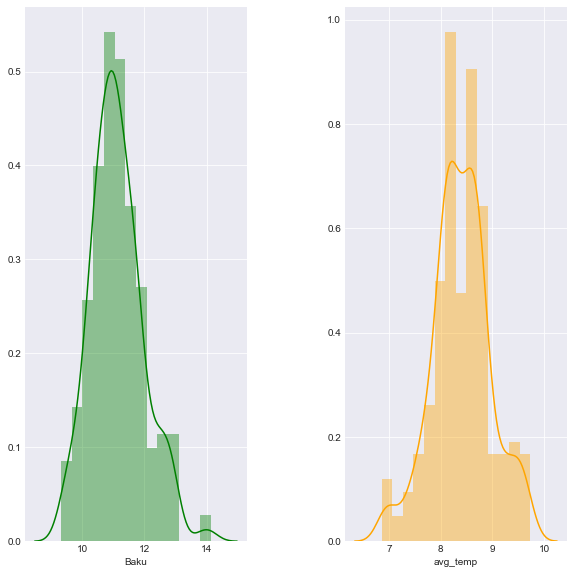

In [22]:
# plot
fig, axarr = plt.subplots(1, 2, figsize=(10, 10))
ax = sns.distplot(combined_data_final["Baku"], color="green",ax=axarr[0])
ax = sns.distplot(combined_data_final["avg_temp"], color="orange",ax=axarr[1])
        
plt.tight_layout(pad=8.0)

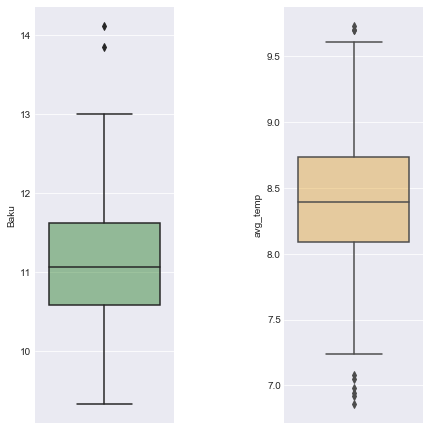

In [23]:
arr = ['Baku','avg_temp']
col = ['green','orange']

fig, axarr = plt.subplots(1,2, figsize=(8,8))
for i in range(len(arr)):
    ax = sns.boxplot(y=arr[i],hue=arr[i],data=combined_data_final, color=col[i],ax=axarr[i])
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .4))
plt.tight_layout(pad=8.0)

#### Time to perform some data manipulation. 

#### Pandas provides multiple built-in methods to calculate moving averages. The rolling method provides rolling windows over the data, allowing us to easily obtain the simple moving average. We can compute the cumulative moving average using the expanding method. The expanding window will include all rows up to the current one in the calculation. Lastly, we can calculate the exponential moving average with the ewm method.

#### I will use the Exponential Moving average method in this research. 

#### It is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.

### Now, we compute the exponential moving averages for my home city Baku and for global temperatures with a smoothing factor of 0.1 and 0.3.

In [24]:
# exponential moving average for Baku
# smoothing factor - 0.1
combined_data_final['EMA_Baku_0.1'] = combined_data_final.Baku.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
combined_data_final['EMA_Baku_0.3'] = combined_data_final.Baku.ewm(alpha=0.3, adjust=False).mean()

# exponential moving average for global temperatures
# smoothing factor - 0.1
combined_data_final['EMA_Global_0.1'] = combined_data_final.avg_temp.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
combined_data_final['EMA_Global_0.3'] = combined_data_final.avg_temp.ewm(alpha=0.3, adjust=False).mean()

#### The following plots show the average air temperature for Baku and the average global temperature together with the exponential moving averages.

Text(0,0.5,'Temperature [°C]')

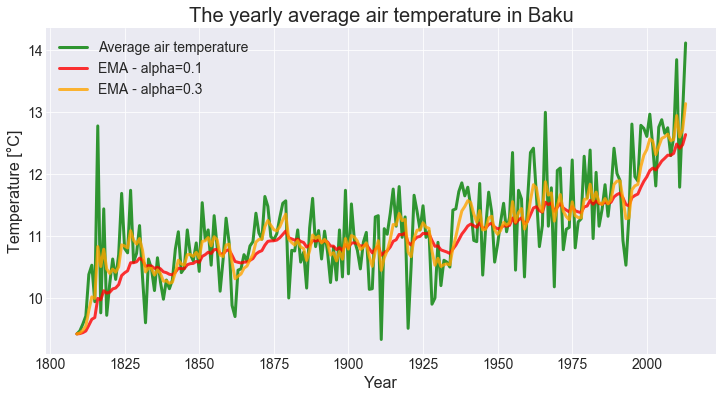

In [25]:

# set Year column as index
combined_data_final.set_index('Year', inplace=True)

# colors for the line plot
colors = ['green', 'red', 'orange']

# line plot - the yearly average air temperature in Baku
combined_data_final[['Baku', 'EMA_Baku_0.1', 'EMA_Baku_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average air temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Baku', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)



Text(0,0.5,'Temperature [°C]')

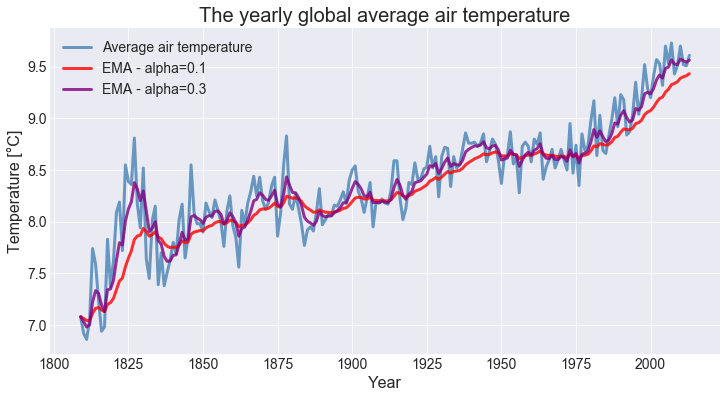

In [26]:
# colors for the line plot
colors = ['steelblue', 'red', 'purple']

# line plot - the yearly global average air temperature 
combined_data_final[['avg_temp', 'EMA_Global_0.1', 'EMA_Global_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average air temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The yearly global average air temperature', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)



#### As shown above, a small weighting factor α results in a high degree of smoothing, while a larger value provides a quicker response to recent changes.

#### Let's compare average air temperature in Baku with the average global temperature with weighting factor 0.1

Text(0,0.5,'Temperature [°C]')

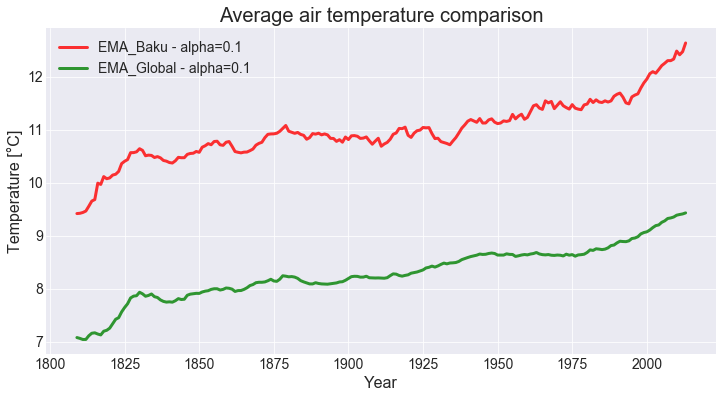

In [27]:
# colors for the line plot
colors = ['red', 'green']

# line plot
combined_data_final[['EMA_Baku_0.1', 'EMA_Global_0.1']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['EMA_Baku - alpha=0.1', 'EMA_Global - alpha=0.1'], fontsize=14)

# title and labels
plt.title('Average air temperature comparison', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)


#### Conclusions:

#### Baku is hotter on average compared to the global average and the difference has been consistent over time;

#### Changes in Baku's temperatures over time has been in line with the changes in the global average;

#### Trend clearly shows the world is getting hotter and the trend has been consistent over the last few hundred years. 